# Topic of the Project

Sentimental Analysis of Employee Review

# Goal Of the Project

The main reason for choosing this dataset was to get an insight on why employees from big companies like Google, Amazon, Microsoft are refraining from working there, is it their working culture or politics inside the company or the way they treat their employees. Through some detailed insights about the company from their recent or current employees, it can help the new joiner to decide whether is it the right place to start their career with.

# Target Audiences

This dataset can be useful for both, The Organization and the User.
 
From Organizational Point of View :-
Predicting what are the chances that the current employee will either stay/leave the organisation.
To improve the organisation’s working culture or work-life balance, such reviews and the results will help them to spot a place for improvement.
Employee Feedback are important for the organisation.
 
From User Point of View :-
It can help the new joiner to decide whether is it the right place to start their career with.


# Dataset Link

https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews

# Importing Libraries

In [19]:
import pandas as pd
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
import datetime
from datetime import datetime
from nltk.corpus import stopwords 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.plotly as py
import matplotlib.gridspec as gridspec
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='rakesh.jain', api_key='TUPydu3LQOjGVAnHZzPw')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanket/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sanket/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df = pd.read_csv("/Users/sanket/Documents/Projects/SML/employee_reviews.csv")

This dataset contains employee reviews separated into the following categories:

1. Index: index
2. Company: Company name
3. Location : This includes the country's name in parenthesis [i.e "Toronto,(Canada)"].
4. Job-Title: This string will also include whether the reviewer is a 'Current' or 'Former' Employee at the time of the review
5. Summary: Short summary of employee review
6. Pros: Pros
7. Cons: Cons
8. Overall Rating: 1-5
9. Work/Life Balance Rating: 1-5
10. Culture and Values Rating: 1-5
11. Career Opportunities Rating: 1-5
12. Comp & Benefits Rating: 1-5
13. Senior Management Rating: 1-5
14. Helpful Review Count: A count of how many people found the review to be helpful
15. Link to Review : This will provide you with a direct link to the page that contains the review. However it is likely that this link will be outdated

In [21]:
df.shape

(67525, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67525 entries, 0 to 67524
Data columns (total 17 columns):
Unnamed: 0                    67525 non-null int64
company                       67525 non-null object
location                      67525 non-null object
dates                         67525 non-null object
job-title                     67525 non-null object
summary                       67405 non-null object
pros                          67525 non-null object
cons                          67525 non-null object
advice-to-mgmt                67228 non-null object
overall-ratings               67525 non-null int64
work-balance-stars            67525 non-null object
culture-values-stars          67525 non-null object
carrer-opportunities-stars    67525 non-null object
comp-benefit-stars            67525 non-null object
senior-mangemnet-stars        67525 non-null object
helpful-count                 67525 non-null int64
link                          67525 non-null object
dtypes: in

In [23]:
#Droppig columns
df.drop(columns=['location', 'link', 'helpful-count', 'Unnamed: 0'], inplace=True)

In [24]:
df.head()

,company,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
0,google,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5
1,google,"Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3
2,google,"May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4
3,google,"Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5
4,google,"Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5


# Cleaning Process

In [25]:
df['dates'] = df['dates'].apply(lambda x: datetime.strptime(x, ' %b %d, %Y'))

In [26]:
new = df["job-title"].str.split(" - ", n = 1, expand = True)
df["job_type"] = new[0]
df["job_title"] = new[1]

In [27]:
#Df Transformations: Converting NONE to Zero as a string.
#Rounding off the value and converted into numeric from string
df['work-balance-stars'] = np.where(df['work-balance-stars']=='none', '0', df['work-balance-stars'])
df['culture-values-stars'] = np.where(df['culture-values-stars']=='none', '0', df['culture-values-stars'])
df['carrer-opportunities-stars'] = np.where(df['carrer-opportunities-stars']=='none', '0', df['carrer-opportunities-stars'])
df['comp-benefit-stars'] = np.where(df['comp-benefit-stars']=='none', '0', df['comp-benefit-stars'])
df['senior-mangemnet-stars'] = np.where(df['senior-mangemnet-stars']=='none', '0', df['senior-mangemnet-stars'])
df['work-balance-stars'] = pd.to_numeric(df['work-balance-stars']).round()
df['culture-values-stars'] = pd.to_numeric(df['culture-values-stars']).round()
df['carrer-opportunities-stars'] = pd.to_numeric(df['carrer-opportunities-stars']).round()
df['comp-benefit-stars'] = pd.to_numeric(df['comp-benefit-stars']).round()
df['senior-mangemnet-stars'] = pd.to_numeric(df['senior-mangemnet-stars']).round()

In [28]:
#Converted the features into int
df['work-balance-stars'] = df['work-balance-stars'].astype(int)
df['overall-ratings'] = df['overall-ratings'].astype(int)
df['culture-values-stars'] = df['culture-values-stars'].astype(int)
df['carrer-opportunities-stars'] = df['carrer-opportunities-stars'].astype(int)
df['comp-benefit-stars'] = df['comp-benefit-stars'].astype(int)
df['senior-mangemnet-stars'] = df['senior-mangemnet-stars'].astype(int)

# NLP Cleaning Process

In [29]:
def clean_data(data,column_name):
    documents = []
    document1 = ''

    stemmer = WordNetLemmatizer()

    for sen in range(0, len(data)):  
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(data[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
    
        document = re.sub(r'[0-9]+',"", document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
        df.at[sen,column_name] = document
    


In [30]:
clean_data(df['pros'],'pros')

In [31]:
clean_data(df['cons'],'cons')

In [32]:
clean_data(df['summary'],'summary')

In [33]:
clean_data(df['advice-to-mgmt'],'advice-to-mgmt')

# Visualization 1

In [34]:
#Plotting the number of reviews present for each company
counts = df['company'].value_counts()
counts = pd.DataFrame(counts)
trace1 = go.Bar(
                x = counts.index,
                y = counts.company,
                name = "Number of reviews for each company",
                marker = dict(color='rgb(26, 118, 255)',
                             line=dict(color='black',width=1.5)),
                text = counts.company)
data = [trace1]
layout = go.Layout(barmode = "group",title='Number of reviews of each company')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Aw, snap! We don't have an account for 'rakesh.jain'. Want to try again?

You can authenticate with your email address or username (case-insensitive).

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

# Visualization 2

In [17]:
def find_employee_type(s):
    x = re.search(r'([^-]*)-',s).group(1)
    return str(x)
    
df['employee-type'] = df['job-title'].apply(find_employee_type)
cmp_lc= df[["company","employee-type"]] 
cmp_lc = cmp_lc.groupby(["company", "employee-type"]).size().reset_index()
cmp_lc = cmp_lc.rename(columns={0: 'total_reviews_by_title'})

years = list(cmp_lc.company.unique())
company_data = []
v = True

for i in years:
    if i!='amazon':
        v=False
    data_upd = [dict(type='bar',
                     visible = v,
                     x = cmp_lc[cmp_lc['company']==i]['employee-type'],
                     y = cmp_lc[cmp_lc['company']==i]['total_reviews_by_title'],
                     textposition = 'auto',
                     marker=dict(
                     color='rgb(158,202,225)',
                     line=dict(
                         color='rgb(8,48,107)',
                         width=1.5),
                     ),
                 opacity=0.6)]
    
    company_data.extend(data_upd)

years = [x.capitalize() for x in years]

# set menus inside the plot
steps = []
yr = 0
for i in range(0,len(company_data)):
    step = dict(method = "restyle",
                args = ["visible", [False]*len(company_data)],
                label = years[yr]) 
    step['args'][1][i] = True
    steps.append(step)
    yr += 1
    

sliders = [dict(active = 6,
                currentvalue = {"prefix": "Company: "},
                pad = {"t": 50},
                steps = steps)]

# Set the layout
layout = dict(title = 'Do current employees review the comapnies more than the ex-employees?',
              sliders = sliders)

fig = dict(data=company_data, layout=layout)
py.iplot(fig)

# Visualization 3

In [18]:
df['year'] = pd.DatetimeIndex(df.dates).year  

In [19]:
cmp_lc = df[["company","dates"]]
cmp_lc = cmp_lc.reset_index(drop=True)
cmp_lc.sort_values(by='dates')
cmp_lc = cmp_lc.groupby(["company", "dates"]).size().reset_index()
cmp_lc = cmp_lc.rename(columns={0: 'total_reviews'})

amazon = go.Scatter(
    x=cmp_lc[cmp_lc['company']=='amazon']['dates'],
    y=cmp_lc[cmp_lc['company']=='amazon']['total_reviews'],
    name = "Amazon",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

microsoft = go.Scatter(
    x=cmp_lc[cmp_lc['company']=='microsoft']['dates'],
    y=cmp_lc[cmp_lc['company']=='microsoft']['total_reviews'],
    name = "Microsoft",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

apple = go.Scatter(
    x=cmp_lc[cmp_lc['company']=='apple']['dates'],
    y=cmp_lc[cmp_lc['company']=='apple']['total_reviews'],
    name = "Apple",
    line = dict(color = '#0fac1f'),
    opacity = 0.8)

google = go.Scatter(
    x=cmp_lc[cmp_lc['company']=='google']['dates'],
    y=cmp_lc[cmp_lc['company']=='google']['total_reviews'],
    name = "Google",
    line = dict(color = '#6335c3'),
    opacity = 0.8)

facebook = go.Scatter(
    x=cmp_lc[cmp_lc['company']=='facebook']['dates'],
    y=cmp_lc[cmp_lc['company']=='facebook']['total_reviews'],
    name = "Facebook",
    line = dict(color = '#808000'),
    opacity = 0.8)


data = [amazon,microsoft,apple,google,facebook]

layout = dict(
    title='Analysing any trend between number of reviews and dates',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

# Visualization 4

In [20]:
from textblob import TextBlob
df[['summary']] = df[['summary']].astype(str)
df['polarity'] = df.apply(lambda x: TextBlob(x['summary']).sentiment.polarity, axis=1)

 
def sentiment(df):
    if df['polarity'] > 0:
        val = "Positive"
    elif df['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df['sentiment_type'] = df.apply(sentiment, axis=1)

cmp_lc = df[["company","sentiment_type"]] 
cmp_lc = cmp_lc.groupby(["company", "sentiment_type"]).size().reset_index()
cmp_lc = cmp_lc.rename(columns={0: 'total_sentiment_types'})

#For plotting it
years = list(cmp_lc.company.unique())
company_data = []
v = True

for i in years:
    if i!='amazon':
        v=False
    data_upd = [dict(type='bar',
                     visible = v,
                     x = cmp_lc[cmp_lc['company']==i]['sentiment_type'],
                     y = cmp_lc[cmp_lc['company']==i]['total_sentiment_types'],
                     textposition = 'auto',
                     marker=dict(
                     color='orange',
                     line=dict(
                         width=1.5),
                     ),
                 opacity=0.6)]
    
    company_data.extend(data_upd)

years = [x.capitalize() for x in years]

# set menus inside the plot
steps = []
yr = 0
for i in range(0,len(company_data)):
    step = dict(method = "restyle",
                args = ["visible", [False]*len(company_data)],
                label = years[yr]) 
    step['args'][1][i] = True
    steps.append(step)
    yr += 1
    

sliders = [dict(active = 6,
                currentvalue = {"prefix": "Company: "},
                pad = {"t": 50},
                steps = steps)]

# Set the layout
layout = dict(title = 'Sentiment analysis for summary text data for each company',
              sliders = sliders)
fig = dict(data=company_data, layout=layout)
py.iplot(fig)

# Visualization 5

In [21]:
rating_cols = ["overall-ratings", "work-balance-stars", "culture-values-stars",
       "carrer-opportunities-stars", "comp-benefit-stars",
       "senior-mangemnet-stars"]

In [22]:
df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors='coerce')

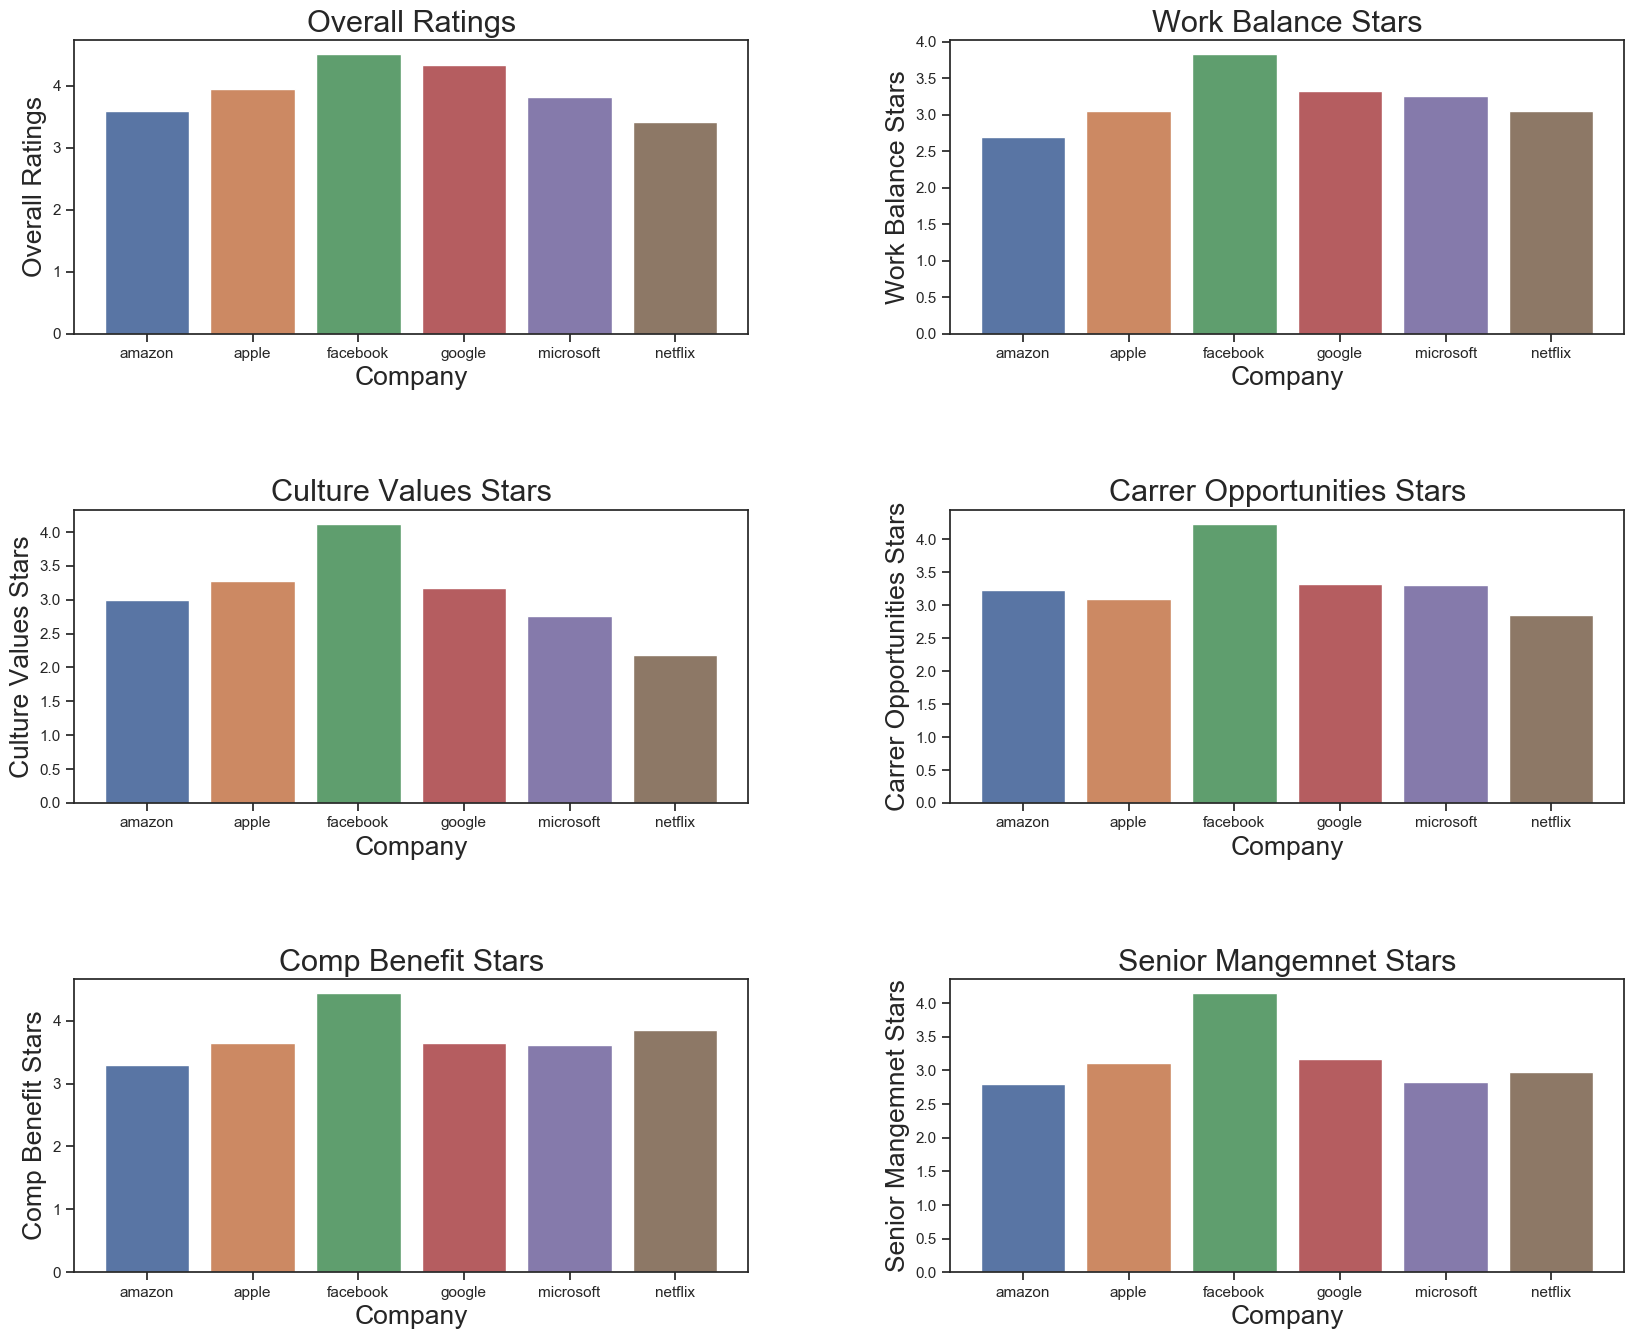

In [23]:
sns.reset_defaults()

figsize=(20, 16)
ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

nrows = 3
ncols = 2

sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style("ticks", {"xtick.major.size": ticksize, "ytick.major.size": ticksize})


fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
plt.subplots_adjust(hspace=.6, wspace=.3)

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize}

plt.rcParams.update(params)


xcol = "company"
xlabel = "Company"

title = "Vote Count Per Company"


feature_count = len(rating_cols)

for i in range(feature_count):
    plt.subplot(nrows,ncols, i+1)
    ylabel = re.sub("[^a-zA-Z]", " ", rating_cols[i])
    ylabel = re.sub("\s+", " ", ylabel).title()
    tmp = df.groupby(xcol, as_index=False)[rating_cols[i]].mean()
    sns.barplot(x=xcol, y=rating_cols[i], data=tmp)
    plt.title(ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()

plt.show()

# Visualization 6

In [24]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

def generate_word_cloud(text,display_title):  
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    extras = ["things","get","well","many","everything","like","really","lot","lots","every","new","none"]
    stopwords.update(extras)

    # iterate through the csv file 
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split()  

        for words in tokens: 
            comment_words = comment_words + words + ' '
        
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 1) 
    plt.title(display_title)
    plt.show() 

amazon


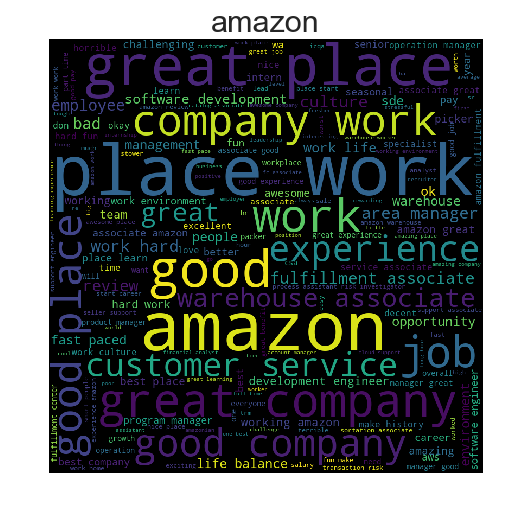

cons


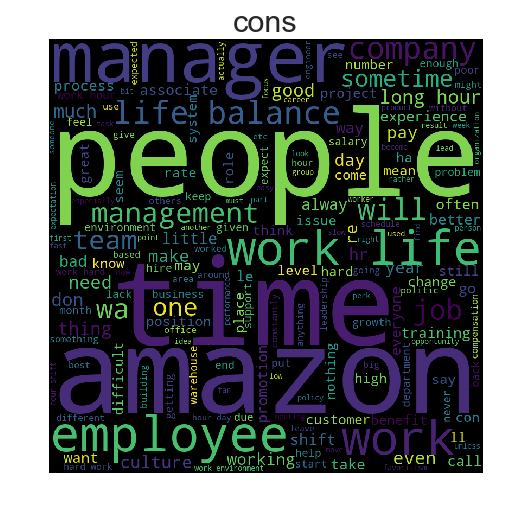

pros


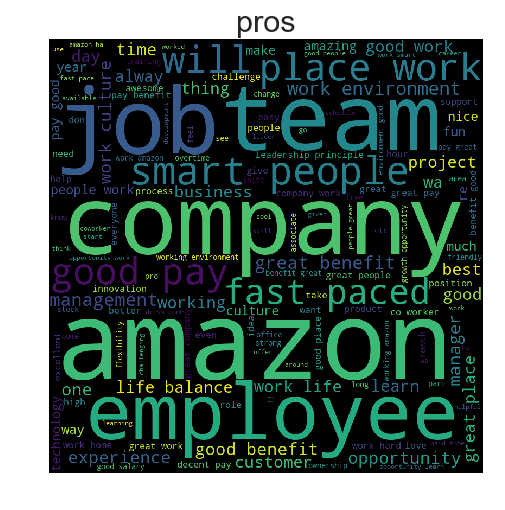

Advice to Management


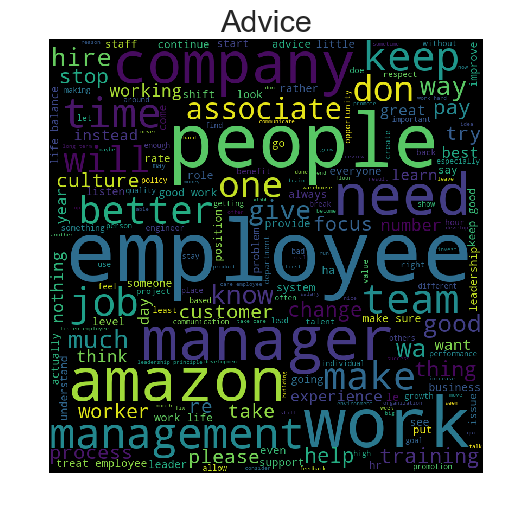

In [25]:
grouped = df.groupby('company')

for name,group in grouped:
    print (name)
    generate_word_cloud(group['summary'],name)
    print('cons')
    generate_word_cloud(group['cons'],'cons')
    print('pros')
    generate_word_cloud(group['pros'],'pros')
    print('Advice to Management')
    generate_word_cloud(group['advice-to-mgmt'],'Advice')
    break;

# Visualization 7

In [26]:
df['is_current_employee'] = df['job-title'].apply(lambda x: 1 if 'Current' in x else 0)
df['is_high_Overall'] = df['overall-ratings'].apply(lambda x: 1 if x>3 else 0)
df['is_high_worbalance']= df['work-balance-stars'].apply(lambda x: 1 if x >3 else 0)
df['is_high_culturevalue']= df['culture-values-stars'].apply(lambda x: 1 if x >3 else 0)
df['is_high_careeropp']= df['carrer-opportunities-stars'].apply(lambda x: 1 if x >3 else 0)
df['is_high_compbenefit']= df['comp-benefit-stars'].apply(lambda x: 1 if x >3 else 0)
df['is_high_srmngmt']= df['senior-mangemnet-stars'].apply(lambda x: 1 if x >3 else 0)

In [27]:
import seaborn as sns
sns.catplot(x = 'overall-ratings', y = 'company',hue= 'is_current_employee', data = df, kind ='box', aspect =2)

In [28]:
sns.catplot(x = 'work-balance-stars', y = 'company',hue= 'is_current_employee', data = df, kind ='box', aspect =2)

In [29]:
sns.catplot(x = 'culture-values-stars', y = 'company', hue= 'is_current_employee', data = df, kind ='box', aspect =2)

In [30]:
sns.catplot(x = 'carrer-opportunities-stars', y = 'company', hue= 'is_current_employee', data = df, kind ='box', aspect =2)

In [31]:
sns.catplot(x = 'comp-benefit-stars', y = 'company', hue= 'is_current_employee', data = df, kind ='box', aspect =2)

In [32]:
sns.catplot(x = 'senior-mangemnet-stars', y = 'company', hue= 'is_current_employee', data = df, kind ='box', aspect =2)

# Visualization 8

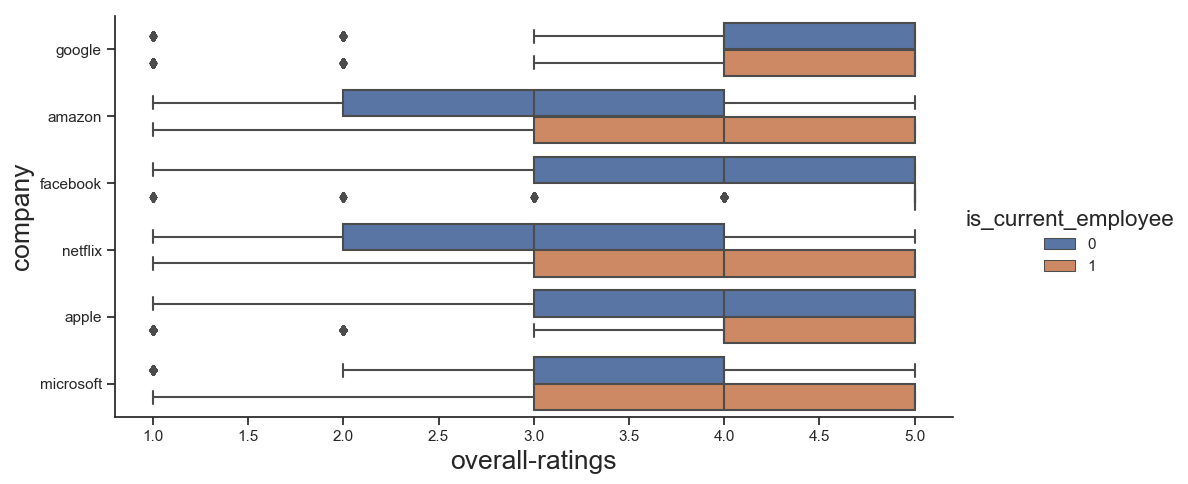

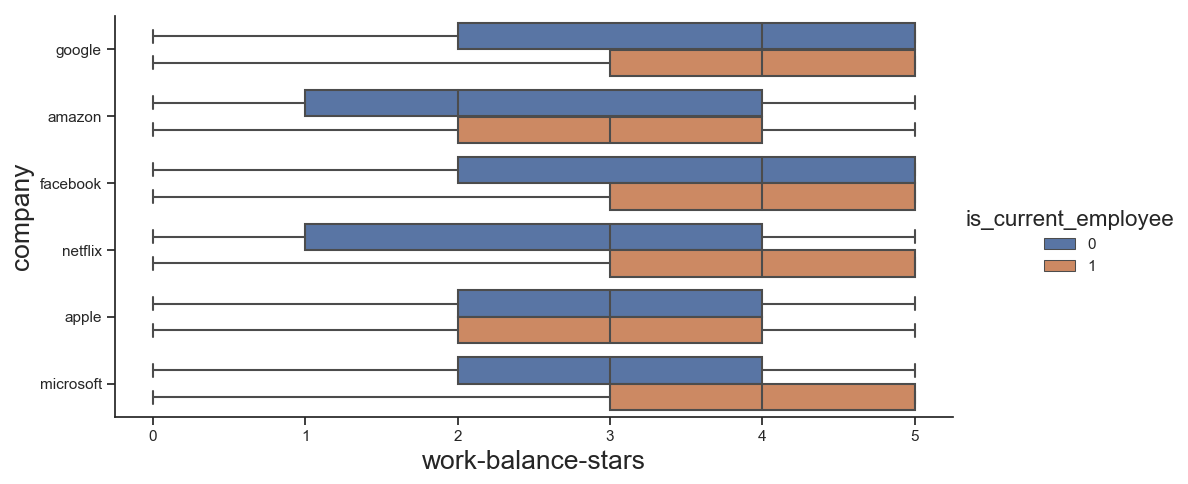

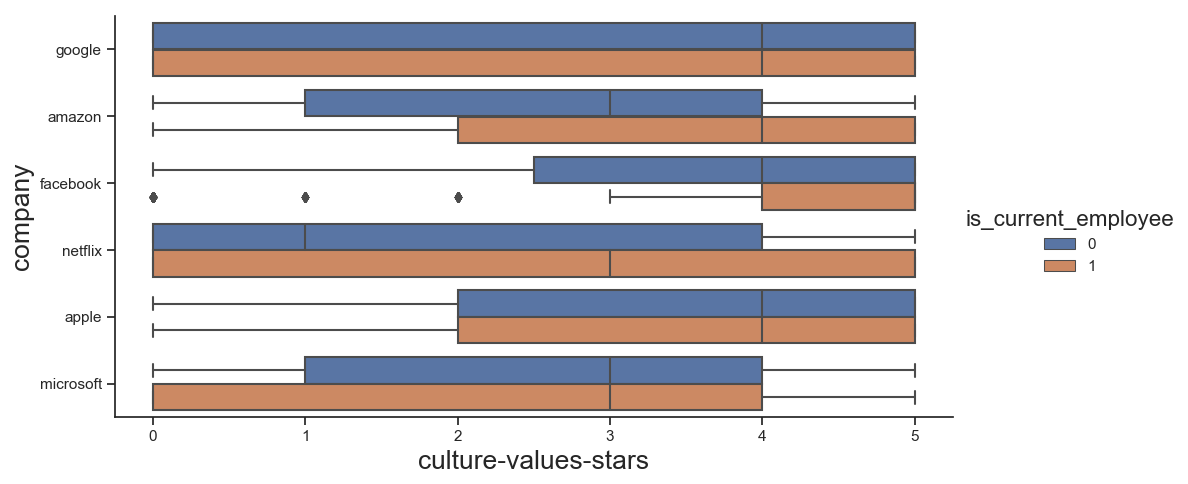

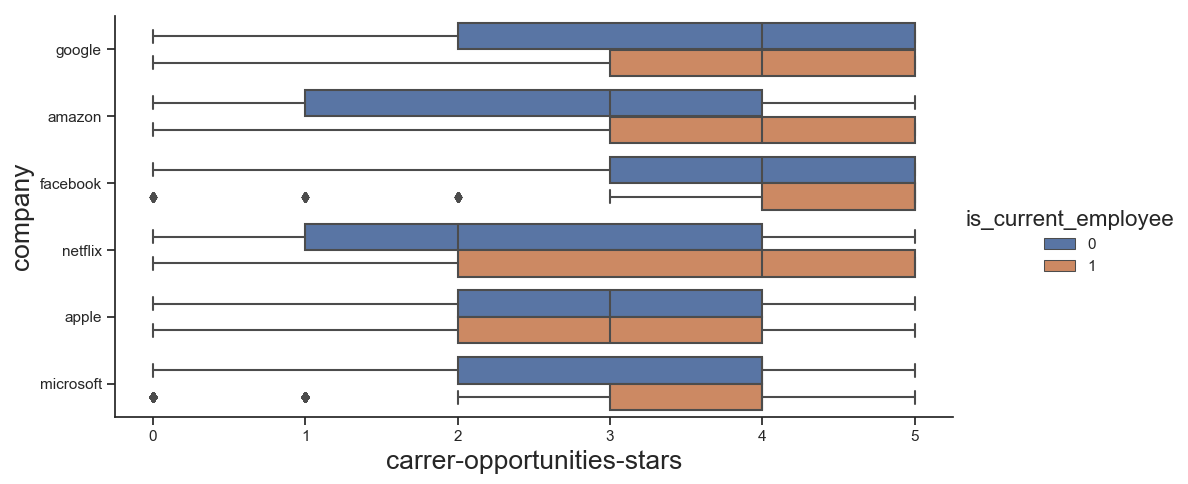

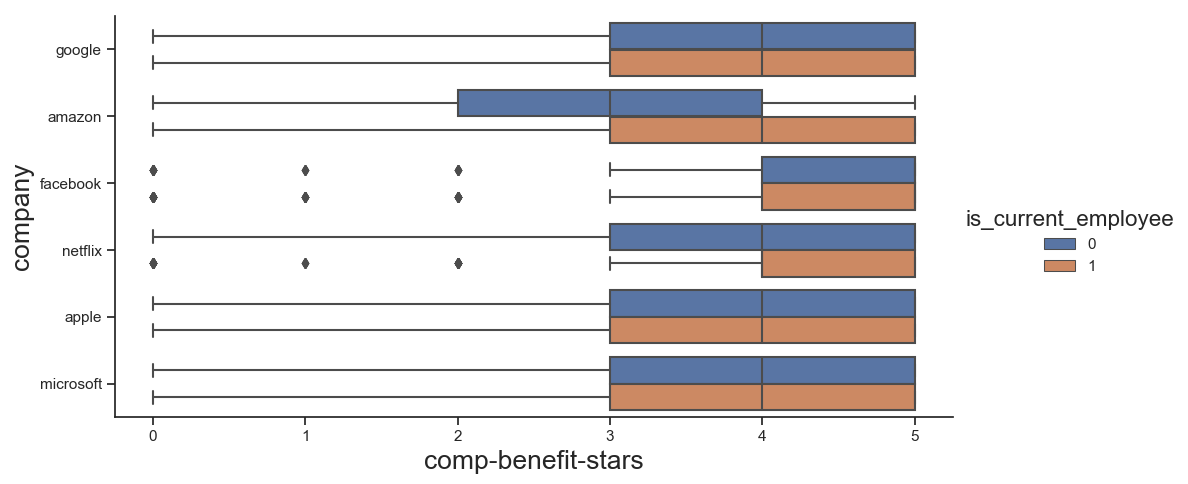

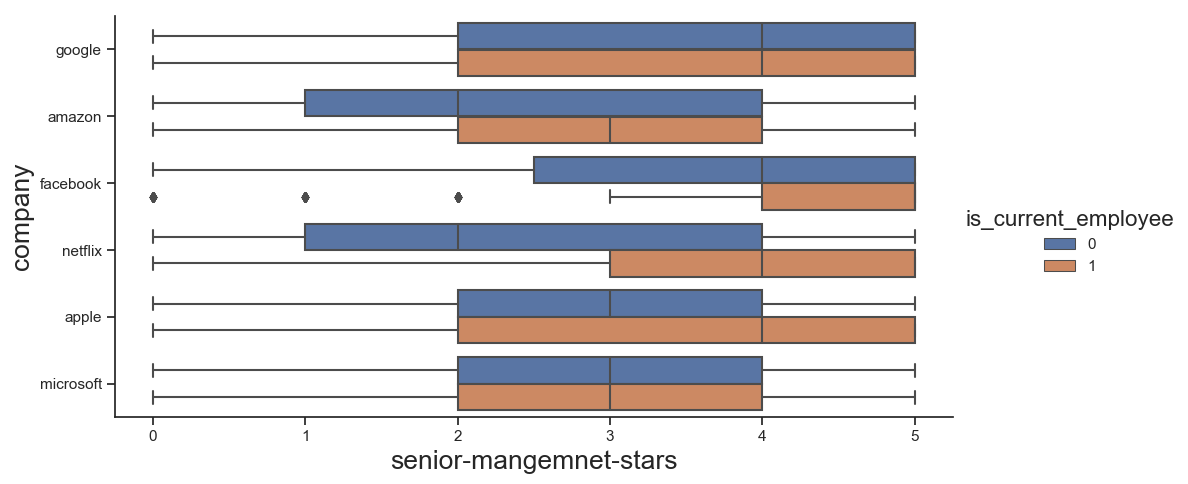

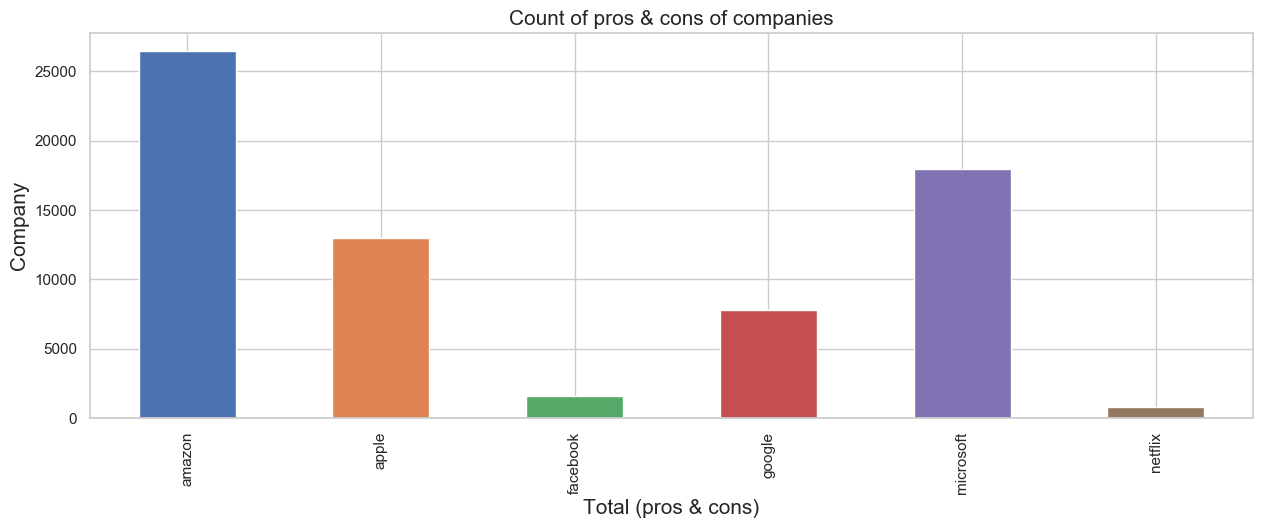

In [33]:
#Comparison of total count of pros/cons company wise
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
sns.set(context='notebook', style='whitegrid')
pl.figure(figsize =(15,5))
df.groupby(['company']).pros.count().plot('bar')
pl.ylabel('Company', fontsize=15)
pl.xlabel('Total (pros & cons)', fontsize=15)
pl.title('Count of pros & cons of companies', fontsize=15)
plt.show()

# Visualization 9

In [34]:
#Classifying and Adding new column of satisfied/Unsatisfied employees to data; 
#If ratings of Features(workBalance, cultureValue, opportunities, benefit, management) are greater than their means: 
#'Satisfied->1' else 'Unsatisfied->0'
df['remarks']=np.where((df['work-balance-stars']>df['work-balance-stars'].mean())& \
                       (df['culture-values-stars']>df['culture-values-stars'].mean())& \
                       (df['carrer-opportunities-stars']>df['carrer-opportunities-stars'].mean())& \
                       (df['comp-benefit-stars']>df['comp-benefit-stars'].mean())& \
                       (df['senior-mangemnet-stars']>df['senior-mangemnet-stars'].mean()), 1, 0)

In [35]:
print('Satisfied Employees:', (df['remarks']==1).sum())
print('Unsatisfied Employees:', (df['remarks']==0).sum())

Satisfied Employees: 16491
Unsatisfied Employees: 51034


In [36]:
#Creating satisfied/Unsatisfied arrays for barplots
satisfied = np.array(df[df['remarks']==1].groupby('company').remarks.count())
unsatisfied = np.array(df[df['remarks']==0].groupby('company').remarks.count())

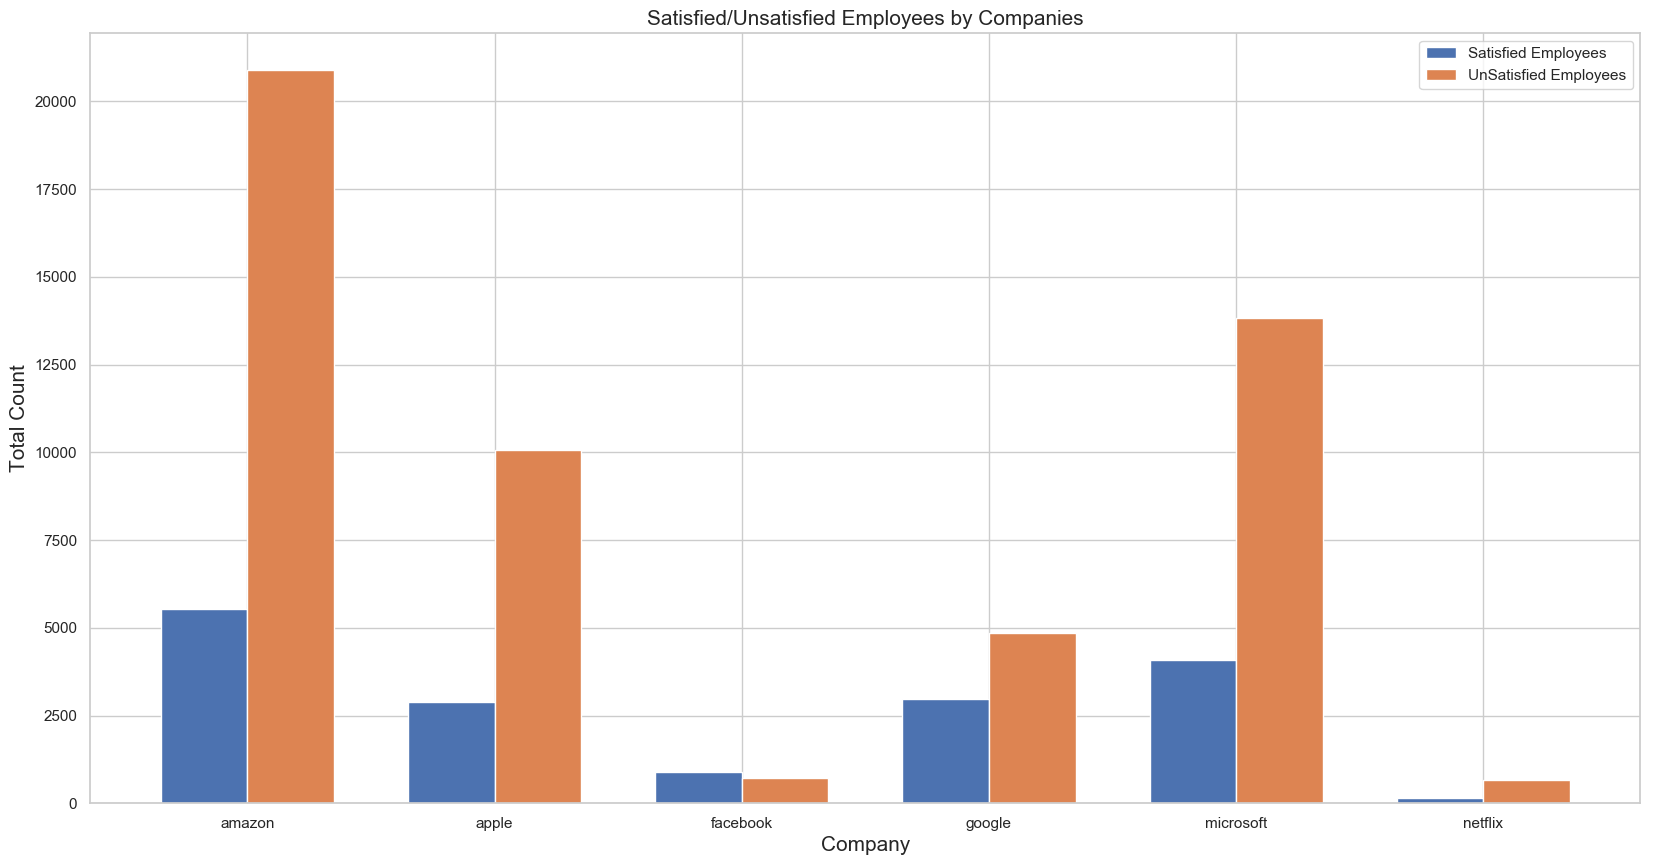

In [37]:
#Plotting satisfied/Unsatisfied employees company wise
pl.figure(figsize =(20,10))
N = 6
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, satisfied, width, label='Satisfied Employees')
plt.bar(ind + width, unsatisfied, width, label='UnSatisfied Employees')

plt.ylabel('Total Count', fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.title('Satisfied/Unsatisfied Employees by Companies', fontsize=15)

plt.xticks(ind + width / 2, ('amazon', 'apple', 'facebook', 'google', 'microsoft', 'netflix'))
plt.legend(loc='best')
plt.show()

# Visualization 10

In [38]:
def plot_heatmap(dataCol1, dataCol2, heading):
    grpby = df.groupby([dataCol1, dataCol2]).size()
    pct = grpby.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
    unstk_data = pct.unstack()
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(unstk_data, annot=True, linewidths=.5, ax=ax, cmap='YlGn')
    ax.set_title(heading)
    fig.tight_layout()
    plt.show()

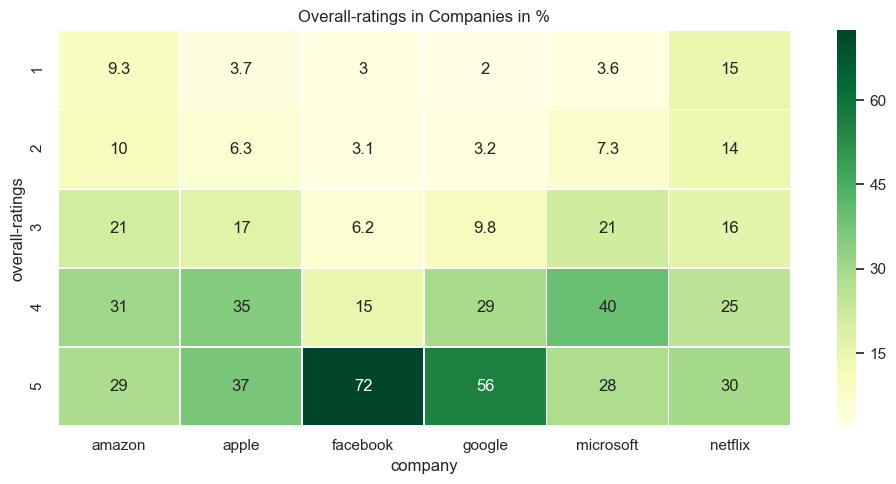

In [39]:
plot_heatmap('overall-ratings','company', 'Overall-ratings in Companies in %' )

#Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are:
#72% people in FB have rated it 5 and overall 87% people are very happy working in FB. This is followed by Gogle with 85%
#NetFlix has got a 55-45% which means people have neutral say about the company
#60% people are happy with Amazon
#72% people are happy with Apple
#68% people are happy with Microsoft

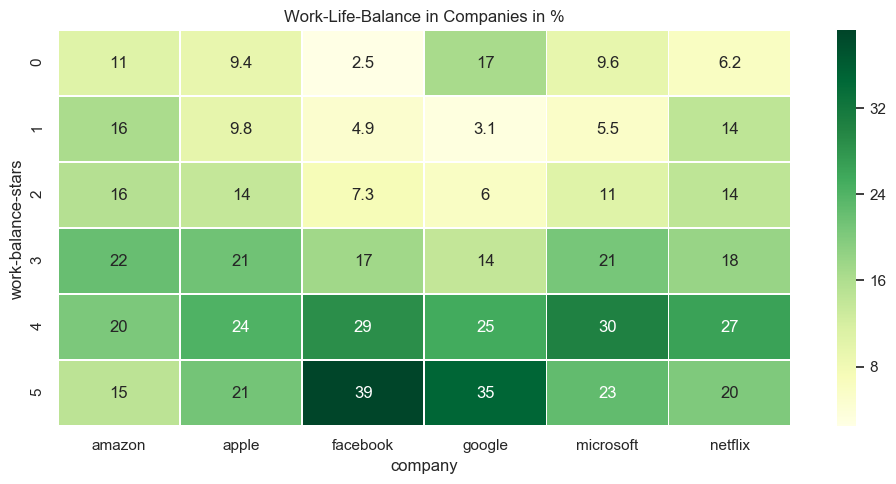

In [40]:
plot_heatmap('work-balance-stars','company', 'Work-Life-Balance in Companies in %' )

#Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are for Work/Life Balance
#46.2% people in amazon have a W/L balance
#54% apple
#70.5% FB
#76.3% Google
#60.6% Microsoft
#50.5% Netflix

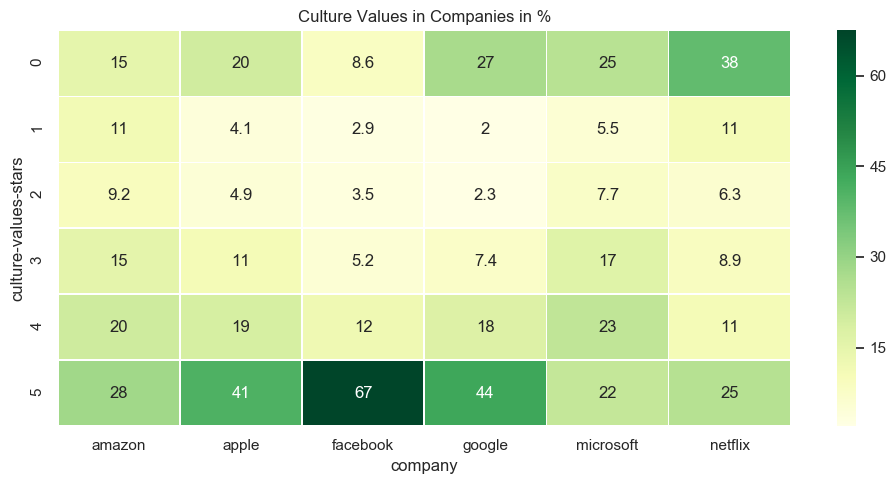

In [41]:
plot_heatmap('culture-values-stars','company', 'Culture Values in Companies in %' )

#In cultural values,
#Facebook leads with 89%
#Amazon 48%
#Apple 60%
#GOogle 62%
#Microsoft 45%
#Netflix 36%

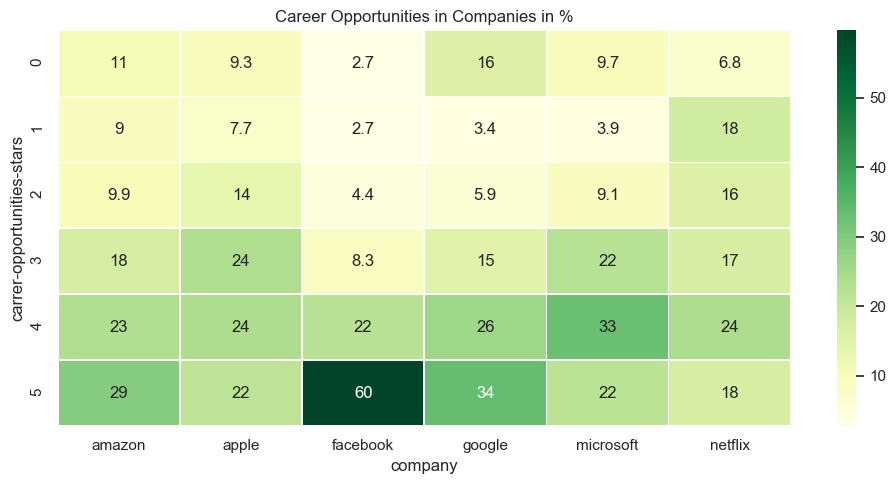

In [42]:
plot_heatmap('carrer-opportunities-stars','company', 'Career Opportunities in Companies in %' )

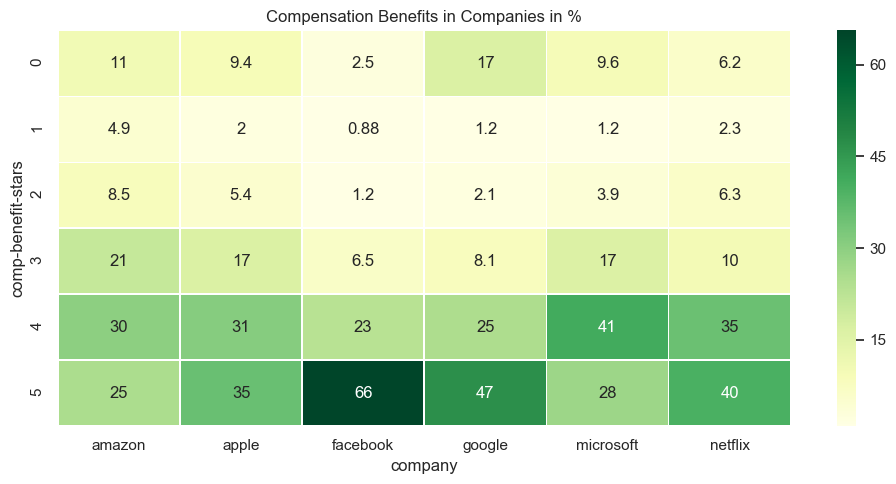

In [43]:
plot_heatmap('comp-benefit-stars','company', 'Compensation Benefits in Companies in %' )

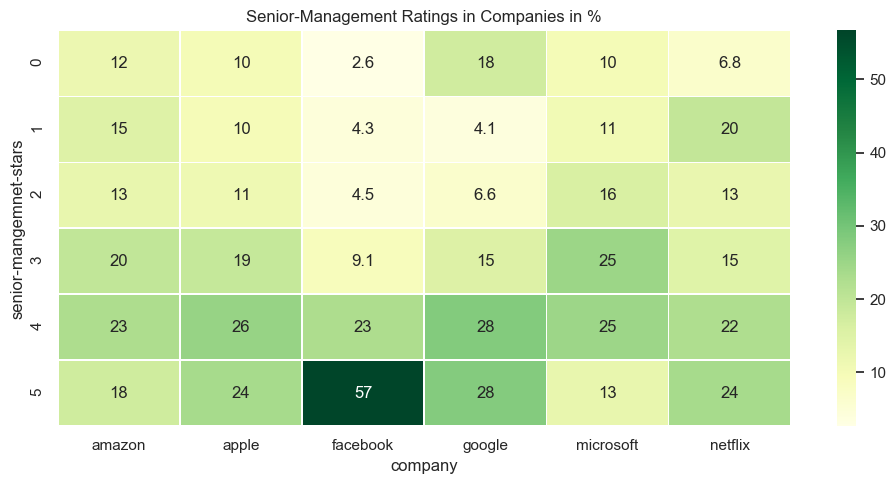

In [44]:
plot_heatmap('senior-mangemnet-stars','company', 'Senior-Management Ratings in Companies in %' )

# Models

In [45]:
df['month'] = df['dates'].dt.month_name()
df['year']= df['dates'].dt.year
df['day']= df['dates'].dt.day
df['week']= df['dates'].dt.week
df['month_no'] = df['dates'].dt.month

In [46]:
df["company"] = df["company"].astype('category')
df["company_cat"] = df["company"].cat.codes
df["overall-ratings"] = df["overall-ratings"].astype('category')
df["overall-ratings_cat"] = df["overall-ratings"].cat.codes
df["work-balance-stars"] = df["work-balance-stars"].astype('category')
df["work-balance-stars_cat"] = df["work-balance-stars"].cat.codes
df["culture-values-stars"] = df["culture-values-stars"].astype('category')
df["culture-values-stars_cat"] = df["culture-values-stars"].cat.codes
df["carrer-opportunities-stars"] = df["carrer-opportunities-stars"].astype('category')
df["carrer-opportunities-stars_cat"] = df["carrer-opportunities-stars"].cat.codes
df["comp-benefit-stars"] = df["comp-benefit-stars"].astype('category')
df["comp-benefit-stars_cat"] = df["comp-benefit-stars"].cat.codes

df["senior-mangemnet-stars"] = df["senior-mangemnet-stars"].astype('category')
df["senior-mangemnet-stars_cat"] = df["senior-mangemnet-stars"].cat.codes
df["job_type"] = df["job_type"].astype('category')
df["job_type_cat"] = df["job_type"].cat.codes
df["job_title"] = df["job_title"].astype('category')
df["job_title_cat"] = df["job_title"].cat.codes


In [47]:
print(df.columns)

Index(['company', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'job_type', 'job_title',
       'employee-type', 'year', 'polarity', 'sentiment_type',
       'is_current_employee', 'is_high_Overall', 'is_high_worbalance',
       'is_high_culturevalue', 'is_high_careeropp', 'is_high_compbenefit',
       'is_high_srmngmt', 'remarks', 'month', 'day', 'week', 'month_no',
       'company_cat', 'overall-ratings_cat', 'work-balance-stars_cat',
       'culture-values-stars_cat', 'carrer-opportunities-stars_cat',
       'comp-benefit-stars_cat', 'senior-mangemnet-stars_cat', 'job_type_cat',
       'job_title_cat'],
      dtype='object')


# SGD Classifier

In [53]:
# Get all the columns from the dataframe.
columns = df.columns.tolist()
# Filtering unrequired columns
columns = [c for c in columns if c not in ['company', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'job_type', 'job_title',
       'employee-type', 'year', 'is_current_employee', 'is_high_Overall',
       'is_high_worbalance', 'is_high_culturevalue', 'is_high_careeropp',
       'is_high_compbenefit', 'is_high_srmngmt', 'remarks','month', 'work-balance-stars_cat','day','week',
    'comp-benefit-stars_cat', 'senior-mangemnet-stars_cat','culture-values-stars_cat', 'carrer-opportunities-stars_cat','polarity','sentiment_type']]
# Storing the variable we'll be predicting on.
target = "remarks"

In [54]:
#Defining features and labels
X = df[columns] #Features
y = df[target] #Labels

In [56]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeaturesSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeaturesSet: (40515, 5)
Training Labels: (40515,)
Testing FeaturesSet: (27010, 5)
Testing Labels: (27010,)


In [57]:
#Initializing the model class.
model = SGDClassifier(max_iter = 1000,tol=1e-3)
#Fitting the model to the training data.
model.fit(X_train, y_train)
#Generating our predictions for the test set.
predictions = model.predict(X_test)
#Computing the Model Accuracy
print("SGD Accuracy:",round(metrics.accuracy_score(y_test, predictions), 2))
#Computing the error.
print("Mean Absolute Error:", round(mean_absolute_error(predictions, y_test), 2))
#Computing classification Report
print("Classification Report:\n", classification_report(y_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df1 = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
print(df1)

SGD Accuracy: 0.28
Mean Absolute Error: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.05      0.09     20428
           1       0.25      1.00      0.40      6582

   micro avg       0.28      0.28      0.28     27010
   macro avg       0.62      0.52      0.25     27010
weighted avg       0.81      0.28      0.17     27010

Confusion Matrix:
         predicted       
                 0      1
actual 0       949  19479
       1         6   6576


In [62]:
# Get all the columns from the dataframe.
columns = df.columns.tolist()
# Filtering unrequired columns
columns1 = [c for c in columns if c not in ['company', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'job_type', 'job_title',
       'employee-type', 'year', 'is_current_employee', 'is_high_Overall',
       'is_high_worbalance', 'is_high_culturevalue', 'is_high_careeropp',
       'is_high_compbenefit', 'is_high_srmngmt', 'remarks','month', 'work-balance-stars_cat', 'job_title_cat','week',
    'comp-benefit-stars_cat', 'senior-mangemnet-stars_cat','culture-values-stars_cat', 'carrer-opportunities-stars_cat','polarity','sentiment_type']]
# Storing the variable we'll be predicting on.
target = "remarks"

In [63]:
#Defining features and labels
X1 = df[columns1] #Features
y1 = df[target] #Labels

In [64]:
# Splitting dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X1_train.shape)
print("Training Labels:", y1_train.shape)
print("Testing FeaturesSet:", X1_test.shape)
print("Testing Labels:", y1_test.shape)

Training FeaturesSet: (54020, 5)
Training Labels: (54020,)
Testing FeaturesSet: (13505, 5)
Testing Labels: (13505,)


In [65]:
#Initializing the model class.
model = SGDClassifier(max_iter = 1000,tol=1e-3, shuffle=True)
#Fitting the model to the training data.
model.fit(X1_train, y1_train)
#Generating our predictions for the test set.
predictions_1 = model.predict(X1_test)

print(model.score(X1_train, y1_train))
print(model.score(X1_test, y1_test))
#Computing the Model Accuracy
print("SGD Accuracy:",round(metrics.accuracy_score(y1_test, predictions_1), 2))
#Computing the error.
print("Mean Absolute Error:", round(mean_absolute_error(predictions_1, y1_test), 2))
#Computing classification Report
print("Classification Report:\n", classification_report(y1_test, predictions_1))
#Plotting confusion matrix
print("Confusion Matrix:")
df2 = pd.DataFrame(
    confusion_matrix(y1_test, predictions_1),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
print(df2)

0.7600888559792669
0.7614957423176602
SGD Accuracy: 0.76
Mean Absolute Error: 0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86     10216
           1       0.54      0.14      0.22      3289

   micro avg       0.76      0.76      0.76     13505
   macro avg       0.66      0.55      0.54     13505
weighted avg       0.72      0.76      0.70     13505

Confusion Matrix:
         predicted     
                 0    1
actual 0      9832  384
       1      2837  452


# Knn Classifier

In [66]:
# Get all the columns from the dataframe.
columns = df.columns.tolist()
# Filtering unrequired columns
columns2 = [c for c in columns if c not in ['company', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'job_type', 'job_title',
       'employee-type', 'year', 'is_current_employee', 'is_high_Overall',
       'is_high_worbalance', 'is_high_culturevalue', 'is_high_careeropp',
       'is_high_compbenefit', 'is_high_srmngmt', 'remarks','month', 'work-balance-stars_cat','job_title_cat','week',
    'comp-benefit-stars_cat', 'senior-mangemnet-stars_cat','culture-values-stars_cat', 'carrer-opportunities-stars_cat','polarity','sentiment_type']]
# Storing the variable we'll be predicting on.
target_2 = "remarks"

In [67]:
#Defining features and labels
X2 = df[columns2] #Features
y2 = df[target_2] #Labels

In [68]:
# Splitting dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=100)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X2_train.shape)
print("Training Labels:", y2_train.shape)
print("Testing FeaturesSet:", X2_test.shape)
print("Testing Labels:", y2_test.shape)

Training FeaturesSet: (50643, 5)
Training Labels: (50643,)
Testing FeaturesSet: (16882, 5)
Testing Labels: (16882,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X2_train,y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [70]:
knn.score(X2_train,y2_train)

0.8128270442114409

In [71]:
knn.score(X2_test,y2_test)

0.7676815543182087

# Decision Tree

In [72]:
# Get all the columns from the dataframe.
columns = df.columns.tolist()
# Filtering unrequired columns
columns4 = [c for c in columns if c not in ['company', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'job_type', 'job_title',
       'employee-type', 'year', 'is_current_employee', 'is_high_Overall',
       'is_high_worbalance', 'is_high_culturevalue', 'is_high_careeropp',
       'is_high_compbenefit', 'is_high_srmngmt', 'remarks','month', 'work-balance-stars_cat','job_title_cat','week',
    'comp-benefit-stars_cat', 'senior-mangemnet-stars_cat','culture-values-stars_cat', 'carrer-opportunities-stars_cat','polarity','sentiment_type']]
# Storing the variable we'll be predicting on.
target_4 = "remarks"

In [73]:
#Defining features and labels
X4 = df[columns4] #Features
y4 = df[target_4] #Labels

In [74]:
# Splitting dataset into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X4_train.shape)
print("Training Labels:", y4_train.shape)
print("Testing FeaturesSet:", X4_test.shape)
print("Testing Labels:", y4_test.shape)

Training FeaturesSet: (47267, 5)
Training Labels: (47267,)
Testing FeaturesSet: (20258, 5)
Testing Labels: (20258,)


In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [76]:
dtree.fit(X4_train,y4_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=300,
            splitter='best')

In [77]:
y_pred=dtree.predict(X4_test)

In [78]:
dtree.score(X4_train,y4_train)

0.8336683098144583

In [79]:
dtree.score(X4_test,y4_test)

0.7627110277421265

# Random Forest Classifier

In [80]:
# Get all the columns from the dataframe.
columns = df.columns.tolist()
# Filtering unrequired columns
columns3 = [c for c in columns if c not in ['company', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'job_type', 'job_title',
       'employee-type', 'year', 'is_current_employee', 'is_high_Overall',
       'is_high_worbalance', 'is_high_culturevalue', 'is_high_careeropp',
       'is_high_compbenefit', 'is_high_srmngmt', 'remarks','month', 'work-balance-stars_cat','job_title_cat','week',
    'comp-benefit-stars_cat', 'senior-mangemnet-stars_cat','culture-values-stars_cat', 'carrer-opportunities-stars_cat','polarity','sentiment_type']]
# Storing the variable we'll be predicting on.
target_3 = "remarks"

In [81]:
#Defining features and labels
X3 = df[columns3] #Features
y3 = df[target_3] #Labels

In [82]:
# Splitting dataset into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X3_train.shape)
print("Training Labels:", y3_train.shape)
print("Testing FeaturesSet:", X3_test.shape)
print("Testing Labels:", y3_test.shape)

Training FeaturesSet: (50643, 5)
Training Labels: (50643,)
Testing FeaturesSet: (16882, 5)
Testing Labels: (16882,)


In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
y_pred=rfc.predict(X3_test)

In [85]:
rfc.score(X3_train,y3_train)

0.8280907529174812

In [86]:
rfc.score(X3_test,y3_test)

0.7635351261698851

# NLP

In [87]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english','spanish')) 
extras = ["things","get","well","many","everything","like","really","lot","lots","every","new","none",'aaaaaaaaaaaaaaa']
stopwords.update(extras)

# Naive Byes - Multinomial

In [88]:
#Defining features and labels
X = df['summary'] #Features
y = df['remarks'] #Labels

In [89]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeaturesSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeaturesSet: (60772,)
Training Labels: (60772,)
Testing FeaturesSet: (6753,)
Testing Labels: (6753,)


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(stop_words=stopwords)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(60772, 8886) (6753, 8886)


In [91]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [92]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("NAIVE BYES Score -> ",accuracy_score(predicted, y_test)*100)

NAIVE BYES Score ->  75.06293499185547


# Logistic Regression

In [93]:
#Defining features and labels
X3 = df['summary'] #Features
y3 = df['remarks'] #Labels

In [94]:
# Splitting dataset into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X3_train.shape)
print("Training Labels:", y3_train.shape)
print("Testing FeaturesSet:", X3_test.shape)
print("Testing Labels:", y3_test.shape)

Training FeaturesSet: (54020,)
Training Labels: (54020,)
Testing FeaturesSet: (13505,)
Testing Labels: (13505,)


In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords,ngram_range=(1, 2))
train_vectors3 = vectorizer.fit_transform(X3_train)
test_vectors3 = vectorizer.transform(X3_test)
print(train_vectors3.shape, test_vectors3.shape)

(54020, 53474) (13505, 53474)


In [96]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=300,solver='lbfgs')

# fit the model with data
logreg.fit(train_vectors3,y3_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
predicted =logreg.predict(test_vectors3)
print("LOGISTIC REGRESSION Score -> ",accuracy_score(predicted, y3_test)*100)

LOGISTIC REGRESSION Score ->  76.17178822658275
